In [1]:
import matplotlib.pyplot as plt
from question4 import *
from etape2_Q3 import *
import numpy as np
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec

In [2]:
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'

In [3]:
df2015 = create_full_df(directory2015)
df2016 = create_full_df(directory2016)
df2017 = create_full_df(directory2017)
df2018 = create_full_df(directory2018)

In [4]:
df_train = pd.concat([df2015, df2016, df2017], ignore_index=True)
df_val = df2018
df_train = df_train.dropna(subset="Distance")
df_val = df_val.dropna(subset="Distance")

In [32]:
X_train_d = df_train["Distance"]
X_train_a = df_train["Angle"]
X_train_dna = df_train[["Distance","Angle"]]
y_train = df_train["Est_un_but"]
X_val_d = df_val["Distance"]
X_val_a = df_val["Angle"]
X_val_dna = df_val[["Distance","Angle"]]
y_val = df_val["Est_un_but"]

In [33]:
y_score_d, y_prob_d, clf_d = logistic_regression(X_train_d, y_train, X_val_d)
y_score_a, y_prob_a, clf_a = logistic_regression(X_train_a, y_train, X_val_a)
y_score_dna, y_prob_dna, clf_dna = logistic_regression(X_train_dna, y_train, X_val_dna)

In [34]:
y_prob_random = np.random.uniform(size=len(y_prob_d), low=0, high=1)

In [35]:
fpr_d, tpr_d, roc_auc_d = get_roc_data(y_prob_d[:,1], y_val)
fpr_a, tpr_a, roc_auc_a = get_roc_data(y_prob_a[:,1], y_val)
fpr_dna, tpr_dna, roc_auc_dna = get_roc_data(y_prob_dna[:,1], y_val)
fpr_random, tpr_random, roc_auc_random = get_roc_data(y_prob_random, y_val)

In [36]:
perc_d, perc_values_d, num_goals_d = get_percentile_goal_chance(y_prob_d[:,1], y_val)
perc_a, perc_values_a, num_goals_a = get_percentile_goal_chance(y_prob_a[:,1], y_val)
perc_dna, perc_values_dna, num_goals_dna = get_percentile_goal_chance(y_prob_dna[:,1], y_val)
perc_random, perc_values_random, num_goals_random = get_percentile_goal_chance(y_prob_random, y_val)

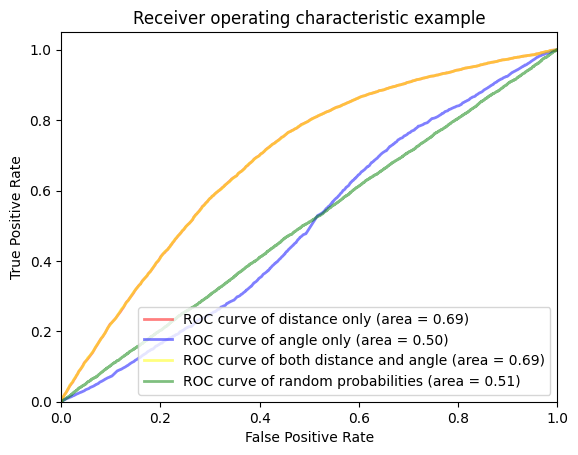

In [37]:
plt.figure()
lw = 2
plt.plot(fpr_d,tpr_d,color="red",lw=lw,alpha=0.5,label="ROC curve of distance only (area = %0.2f)" % roc_auc_d)
plt.plot(fpr_a,tpr_a,color="blue",lw=lw,alpha=0.5,label="ROC curve of angle only (area = %0.2f)" % roc_auc_a)
plt.plot(fpr_dna,tpr_dna,color="yellow",lw=lw,alpha=0.5,label="ROC curve of both distance and angle (area = %0.2f)" % roc_auc_dna)
plt.plot(fpr_random,tpr_random,color="green",lw=lw,alpha=0.5,label="ROC curve of random probabilities (area = %0.2f)" % roc_auc_random)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

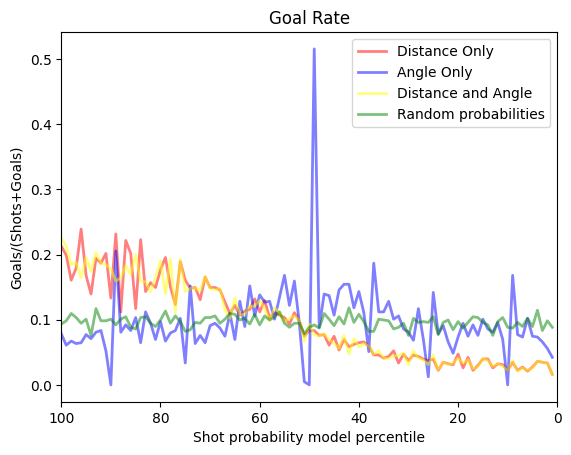

In [44]:
plt.figure()
lw = 2
sum_goal_shot = len(y_val)/100
goal_rate_d = [i/sum_goal_shot for i in num_goals_d]
goal_rate_a = [i/sum_goal_shot for i in num_goals_a]
goal_rate_dna = [i/sum_goal_shot for i in num_goals_dna]
goal_rate_random = [i/sum_goal_shot for i in num_goals_random]
plt.plot(perc_d,goal_rate_d,color="red",alpha=0.5,lw=lw,label="Distance Only")
plt.plot(perc_a,goal_rate_a,color="blue",alpha=0.5,lw=lw,label="Angle Only")
plt.plot(perc_dna,goal_rate_dna,color="yellow",alpha=0.5,lw=lw,label="Distance and Angle")
plt.plot(perc_random,goal_rate_random,color="green",alpha=0.5,lw=lw,label="Random probabilities")
plt.xlim([100, 0])
#plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()

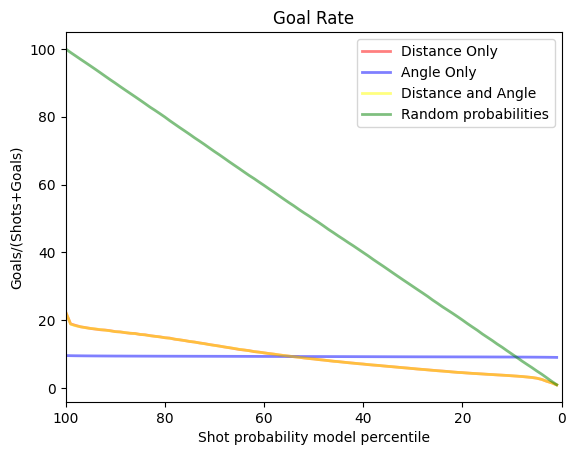

In [46]:
#Not sure which one should be goal rate, this figure or the one above...
plt.figure()
lw = 2
goal_rate_d = [i*100 for i in perc_values_d]
goal_rate_a = [i*100 for i in perc_values_a]
goal_rate_dna = [i*100 for i in perc_values_dna]
goal_rate_random = [i*100 for i in perc_values_random]
plt.plot(perc_d,goal_rate_d,color="red",alpha=0.5,lw=lw,label="Distance Only")
plt.plot(perc_a,goal_rate_a,color="blue",alpha=0.5,lw=lw,label="Angle Only")
plt.plot(perc_dna,goal_rate_dna,color="yellow",alpha=0.5,lw=lw,label="Distance and Angle")
plt.plot(perc_random,goal_rate_random,color="green",alpha=0.5,lw=lw,label="Random probabilities")
plt.xlim([100, 0])
#plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()

In [39]:
cum_values_d = np.cumsum(num_goals_d)
cum_values_a = np.cumsum(num_goals_a)
cum_values_dna = np.cumsum(num_goals_dna)
cum_values_random = np.cumsum(num_goals_random)

In [40]:
sum = np.sum(num_goals_d)/100
cum_values_d = [i/sum for i in cum_values_d]
cum_values_a = [i/sum for i in cum_values_a]
cum_values_dna = [i/sum for i in cum_values_dna]
cum_values_random = [i/sum for i in cum_values_random]

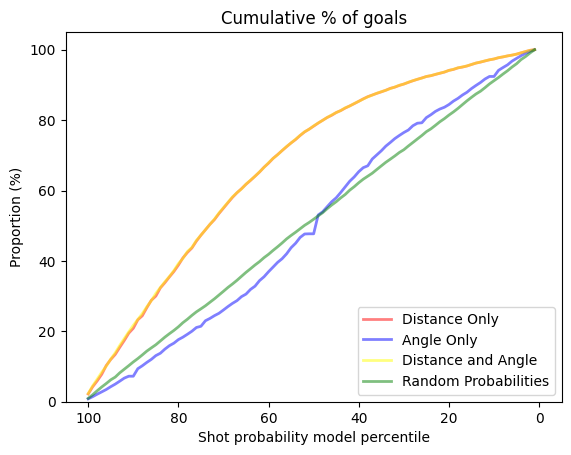

In [41]:
plt.figure()
lw = 2
plt.plot(perc_d,cum_values_d,color="red",alpha=0.5,lw=lw,label="Distance Only")
plt.plot(perc_a,cum_values_a,color="blue",alpha=0.5,lw=lw,label="Angle Only")
plt.plot(perc_dna,cum_values_dna,color="yellow",alpha=0.5,lw=lw,label="Distance and Angle")
plt.plot(perc_random,cum_values_random,color="green",alpha=0.5,lw=lw,label="Random Probabilities")
plt.xlim([105, -5])
plt.ylim([0, 105])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Proportion (%)")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.show()

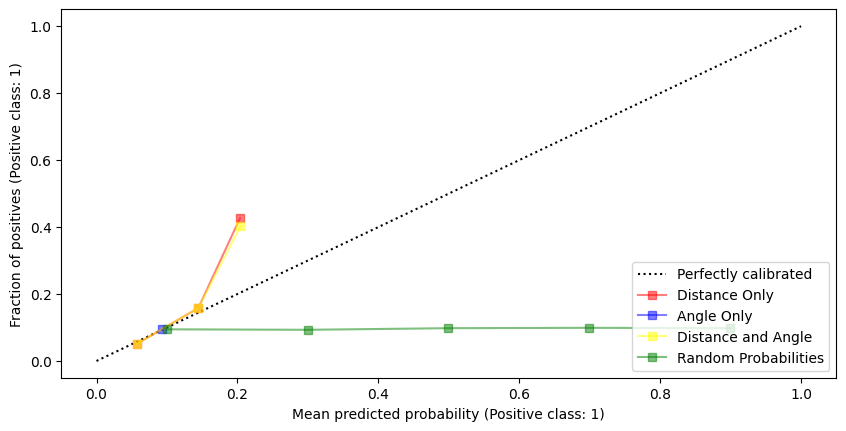

In [42]:
X_val_d = np.array(X_val_d)
X_val_d = X_val_d.reshape(-1, 1)
X_val_a = np.array(X_val_a)
X_val_a = X_val_a.reshape(-1, 1)
fig = plt.figure(figsize=(10,10))
ax_calibration_curve = fig.add_subplot(GridSpec(4,2)[:2,:2])
disp = CalibrationDisplay.from_estimator(clf_d, X_val_d, y_val, color="red", name="Distance Only", alpha=0.5, ax=ax_calibration_curve, n_bins=10)
disp = CalibrationDisplay.from_estimator(clf_a, X_val_a, y_val, color="blue",name="Angle Only",alpha=0.5, ax=ax_calibration_curve,n_bins=10)
disp = CalibrationDisplay.from_estimator(clf_dna, X_val_dna, y_val, color="yellow",name="Distance and Angle",alpha=0.5, ax=ax_calibration_curve,n_bins=10)
disp = CalibrationDisplay.from_predictions(y_val, y_prob_random, color="green",name="Random Probabilities",alpha=0.5, ax=ax_calibration_curve)